In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import joblib

import warnings
warnings.filterwarnings('ignore')


pd.options.display.max_columns=100
plt.style.use('ggplot')

In [2]:
df=pd.read_csv('csv_files/final_data.csv')

In [3]:
df

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.000000,32.0,104,0.000000,0.000000,0.009585,0.0,0.000000,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.000000,30.0,15,0.000000,0.000000,0.069018,0.0,0.000000,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.000000,37.0,4,0.000000,0.000000,0.000000,0.0,0.000000,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.000000,25.0,82,0.028090,0.056180,0.224719,0.0,0.000000,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.000000,30.0,63,0.017889,0.017889,0.053667,0.0,0.000000,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10749,/aidan-simmons/profil/spieler/867763,Western Sydney Wanderers,Aidan Simmons,Attack-RightWinger,181.240353,20.0,16,0.175953,0.087977,0.263930,0.0,0.000000,0.000000,0.000000,1023,0,0,0,75000,75000,4,1
10750,/kusini-yengi/profil/spieler/708099,Western Sydney Wanderers,Kusini Yengi,Attack Centre-Forward,190.000000,24.0,26,0.372671,0.186335,0.186335,0.0,0.000000,0.000000,0.000000,1449,102,18,0,300000,300000,4,0
10751,/nathanael-blair/profil/spieler/1023268,Western Sydney Wanderers,Nathanael Blair,Attack Centre-Forward,181.240353,19.0,20,0.375000,0.000000,0.187500,0.0,0.000000,0.000000,0.000000,960,0,0,0,50000,50000,4,0
10752,/zachary-sapsford/profil/spieler/703657,Western Sydney Wanderers,Zachary Sapsford,Attack Centre-Forward,181.240353,20.0,17,0.312139,0.104046,0.000000,0.0,0.104046,0.000000,0.000000,865,0,0,0,50000,50000,4,0


In [4]:
df=df.drop(columns=['team','player','name','position_encoded','winger'],errors='ignore')

(-0.5, 15.5)

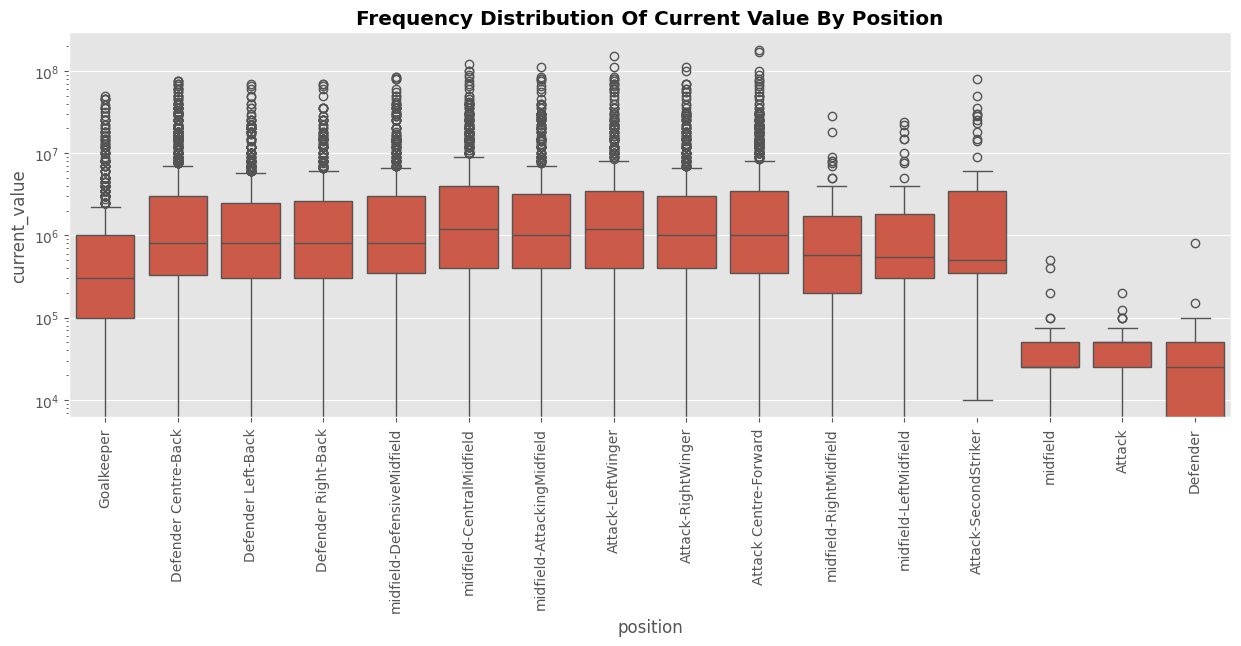

In [5]:
plt.figure(figsize=(15,5))
plt.title('Frequency Distribution Of Current Value By Position',fontweight='bold')
sns.boxplot(df,x='position',y='current_value')
plt.yscale('log')
plt.xticks(rotation=90)
plt.xlim()

In [6]:
df.select_dtypes([int,float]).corr()['current_value'].sort_values(ascending=False)

current_value          1.000000
highest_value          0.834553
minutes played         0.420542
appearance             0.419656
award                  0.300454
assists                0.137415
games_injured          0.135654
goals                  0.121574
days_injured           0.107686
height                 0.040535
red cards             -0.010171
clean sheets          -0.011684
yellow cards          -0.011766
second yellow cards   -0.013889
age                   -0.050156
goals conceded        -0.063529
Name: current_value, dtype: float64

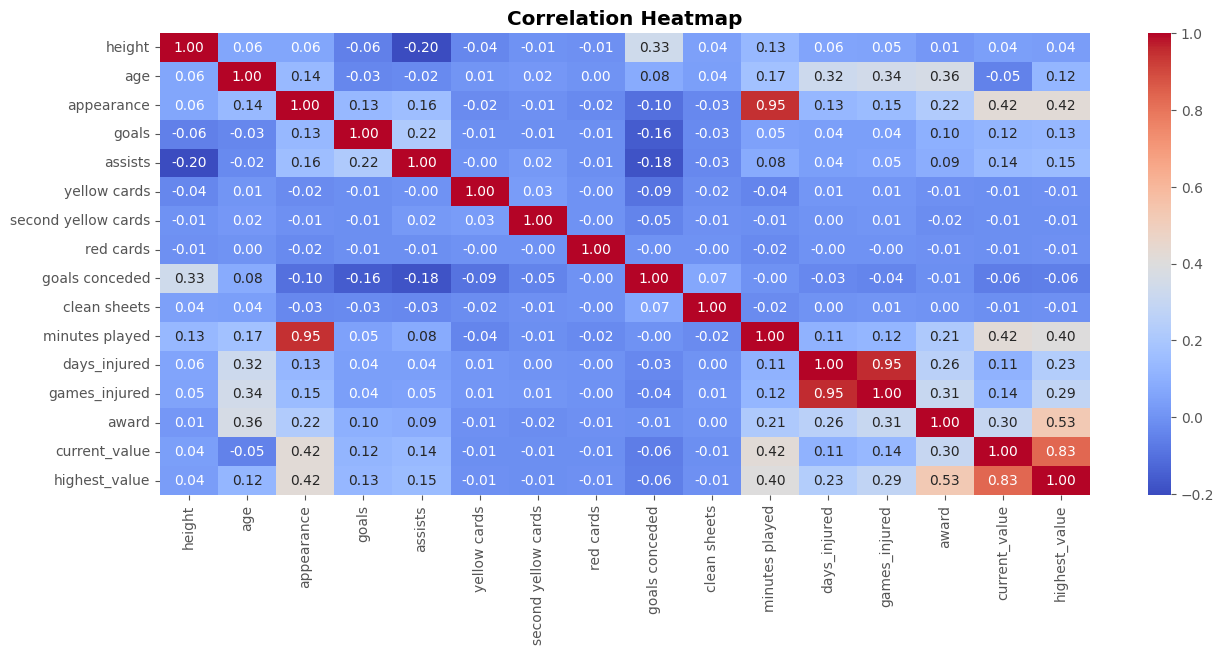

In [7]:
plt.figure(figsize=(15,6))
sns.heatmap(df.select_dtypes([int,float]).corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.title('Correlation Heatmap',fontweight='bold')
plt.show()

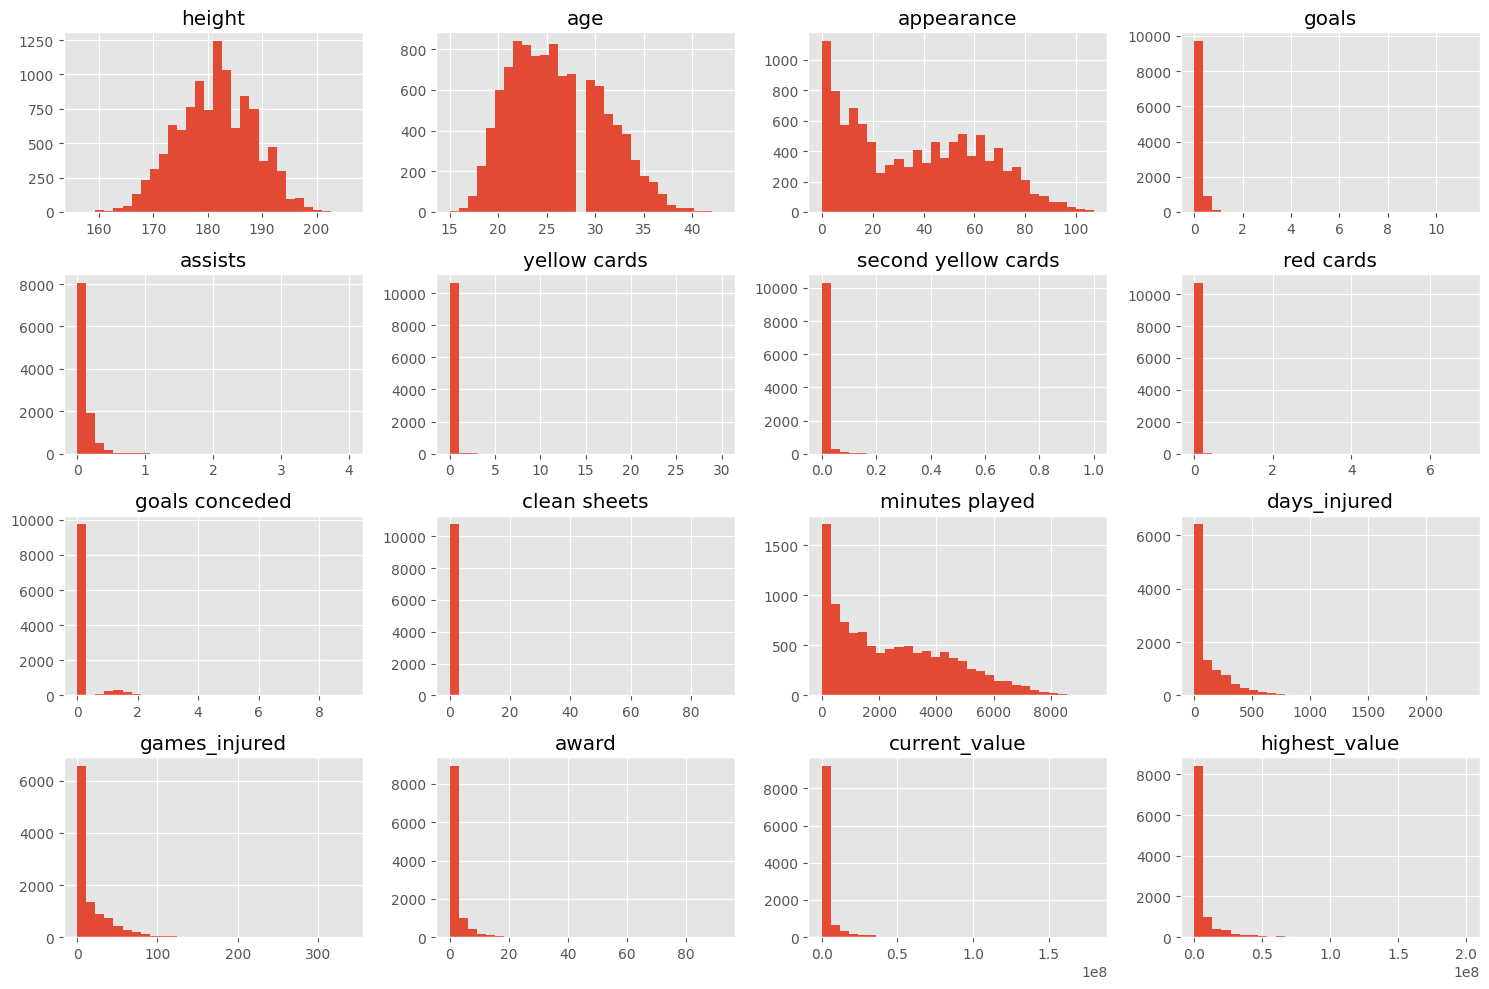

In [8]:
df.hist(figsize=(15,10),bins=30)
plt.tight_layout()
plt.show()

In [9]:
df.isna().sum().sum()

0

In [10]:
for col in df.select_dtypes(object).columns:
    dummies=pd.get_dummies(df[col],prefix=col,dummy_na=True).astype(int)
    df=df.drop(columns=col)
    df=pd.concat([df,dummies],axis=1)
    print(col)

position


In [11]:
df

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_Attack,position_Attack Centre-Forward,position_Attack-LeftWinger,position_Attack-RightWinger,position_Attack-SecondStriker,position_Defender,position_Defender Centre-Back,position_Defender Left-Back,position_Defender Right-Back,position_Goalkeeper,position_midfield,position_midfield-AttackingMidfield,position_midfield-CentralMidfield,position_midfield-DefensiveMidfield,position_midfield-LeftMidfield,position_midfield-RightMidfield,position_nan
0,189.000000,32.0,104,0.000000,0.000000,0.009585,0.0,0.000000,1.217252,0.335463,9390,42,5,13,15000000,70000000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,196.000000,30.0,15,0.000000,0.000000,0.069018,0.0,0.000000,1.242331,0.207055,1304,510,58,1,1500000,22000000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,188.000000,37.0,4,0.000000,0.000000,0.000000,0.0,0.000000,0.616438,0.924658,292,697,84,4,600000,6000000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,175.000000,25.0,82,0.028090,0.056180,0.224719,0.0,0.000000,0.000000,0.000000,6408,175,22,9,50000000,50000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,191.000000,30.0,63,0.017889,0.017889,0.053667,0.0,0.000000,0.000000,0.000000,5031,238,51,21,40000000,80000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10749,181.240353,20.0,16,0.175953,0.087977,0.263930,0.0,0.000000,0.000000,0.000000,1023,0,0,0,75000,75000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
10750,190.000000,24.0,26,0.372671,0.186335,0.186335,0.0,0.000000,0.000000,0.000000,1449,102,18,0,300000,300000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10751,181.240353,19.0,20,0.375000,0.000000,0.187500,0.0,0.000000,0.000000,0.000000,960,0,0,0,50000,50000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10752,181.240353,20.0,17,0.312139,0.104046,0.000000,0.0,0.104046,0.000000,0.000000,865,0,0,0,50000,50000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
X=df.drop(columns='current_value')
y=df['current_value']

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [13]:
from xgboost import XGBRegressor

In [14]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(model):
    train_sizes,train_scores,test_scores=learning_curve(
        X=X_train,
        y=y_train,
        estimator=model,
        train_sizes=np.linspace(0.1,1,10),
        cv=3,
        scoring='neg_root_mean_squared_error',
        #verbose=1
    )
    
    train_scores_mean=np.mean(train_scores,axis=1)
    train_scores_std=np.std(train_scores,axis=1)
    test_scores_mean=np.mean(test_scores,axis=1)
    test_scores_std=np.std(test_scores,axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', color='blue')
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='blue')
    plt.plot(train_sizes, test_scores_mean, label='Validation Accuracy', color='red')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color='red')
    plt.xlabel('Training Set Size')
    plt.ylabel('MAE')
    plt.title('Learning Curve for XGBoost Regressor')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

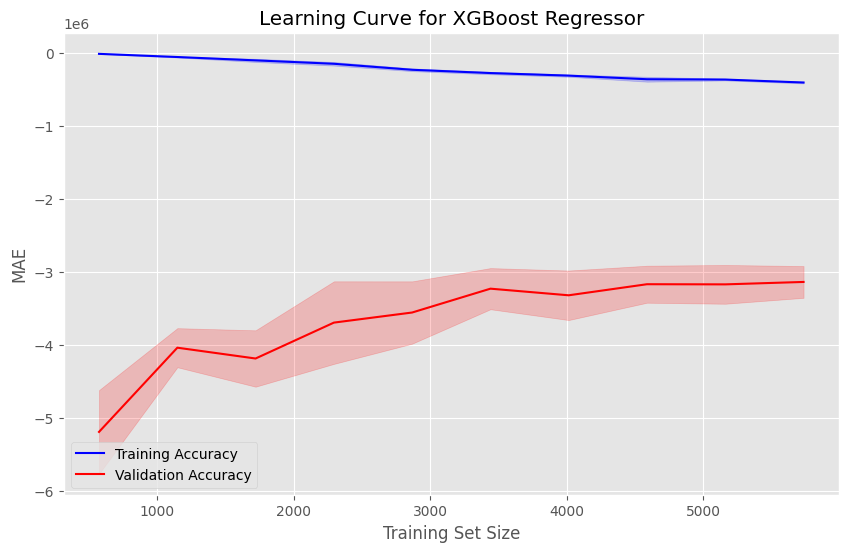

In [15]:
plot_learning_curve(XGBRegressor()) #initial model

%%time

from sklearn.model_selection import GridSearchCV

param_grid={'n_estimators':[100,500,1000,2000],
            'max_depth':[3,5,8,10],
            'learning_rate':[0.01,0.05,0.1,0.15]}

grid_search_cv=GridSearchCV(estimator=XGBRegressor(),
                         param_grid=param_grid,
                         scoring='neg_root_mean_squared_error',
                         cv=3,
                         verbose=1,
                         n_jobs=-1
)

grid_search_cv.fit(X_train,y_train)

best_model=grid_search_cv.best_estimator_
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)
print(grid_search_cv.best_params_)


joblib.dump(best_model,open('best_model.pickle','wb'))

In [16]:
best_model=joblib.load('best_model.pickle','rb')

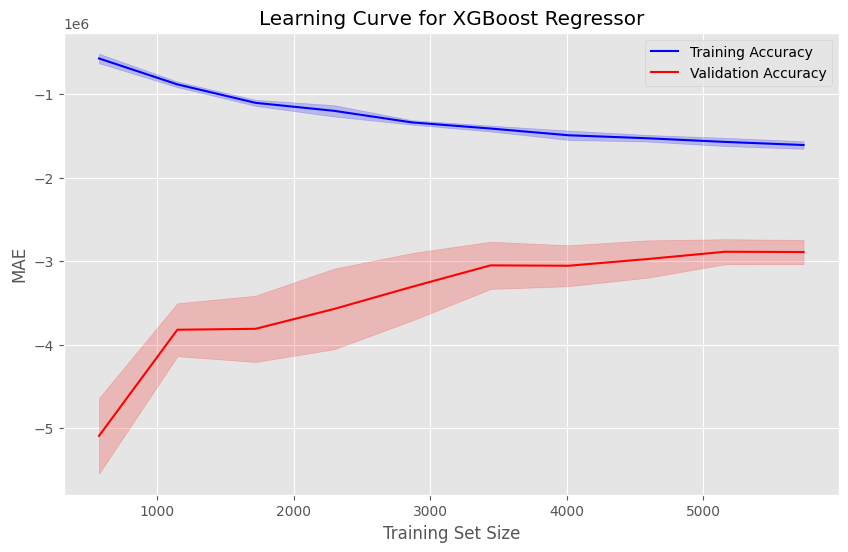

In [17]:
plot_learning_curve(best_model)

In [18]:
train_prediction=best_model.predict(X_train)
test_prediction=best_model.predict(X_test)

In [19]:
from sklearn import metrics

r2_train=metrics.r2_score(train_prediction,y_train)
r2_test=metrics.r2_score(test_prediction,y_test)
mae_train=metrics.mean_absolute_error(train_prediction,y_train)
mae_test=metrics.mean_absolute_error(test_prediction,y_test)
rmse_train=metrics.mean_squared_error(train_prediction,y_train,squared=False)
rmse_test=metrics.mean_squared_error(test_prediction,y_test,squared=False)
train_scores={'R2_train':r2_train,'MAE_train':mae_train,'RMSE_train':rmse_train}
test_scores={'R2_test':r2_test,'MAE_test':mae_test,'RMSE_test':rmse_test}
print(train_scores)
print(test_scores)

{'R2_train': 0.9474462270031907, 'MAE_train': 860173.8248594169, 'RMSE_train': 2054692.7808947514}
{'R2_test': 0.9531955073394436, 'MAE_test': 751533.6628306241, 'RMSE_test': 1617793.1070827413}


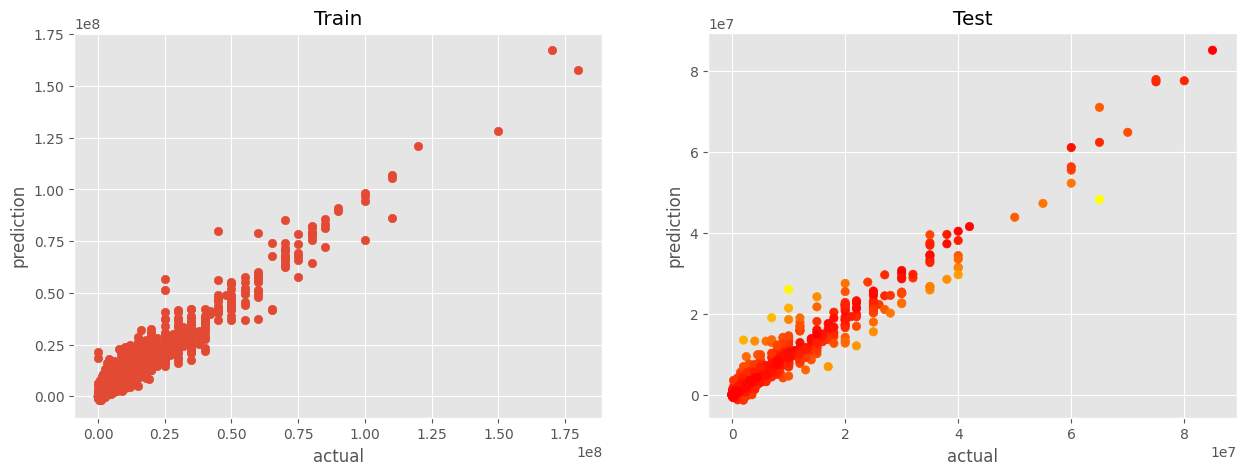

In [20]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
ax1.scatter(y_train,train_prediction)
ax1.set_xlabel('actual')
ax1.set_ylabel('prediction')
ax1.set_title('Train')
ax2.scatter(y_test,test_prediction,c=(y_test-test_prediction).abs(),cmap='autumn')
ax2.set_xlabel('actual')
ax2.set_ylabel('prediction')
ax2.set_title('Test')

    
plt.show()

<BarContainer object of 32 artists>

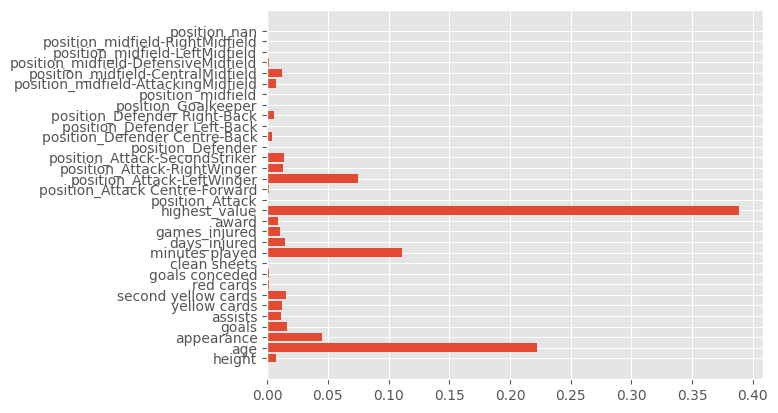

In [21]:
weights=best_model.feature_importances_
names=best_model.feature_names_in_

plt.barh(y=names,width=weights)

In [22]:
X_test['position_']=X_test[X_test.columns[X_test.columns.str.startswith('position_')]].idxmax(axis=1).str.replace('position_','')
X_test=X_test.drop(columns=X_test.columns[X_test.columns.str.startswith('position_')])

X_test['Actual']=y_test
X_test['Prediction']=test_prediction
X_test['ABS Error']=(X_test['Actual']-X_test['Prediction']).abs()

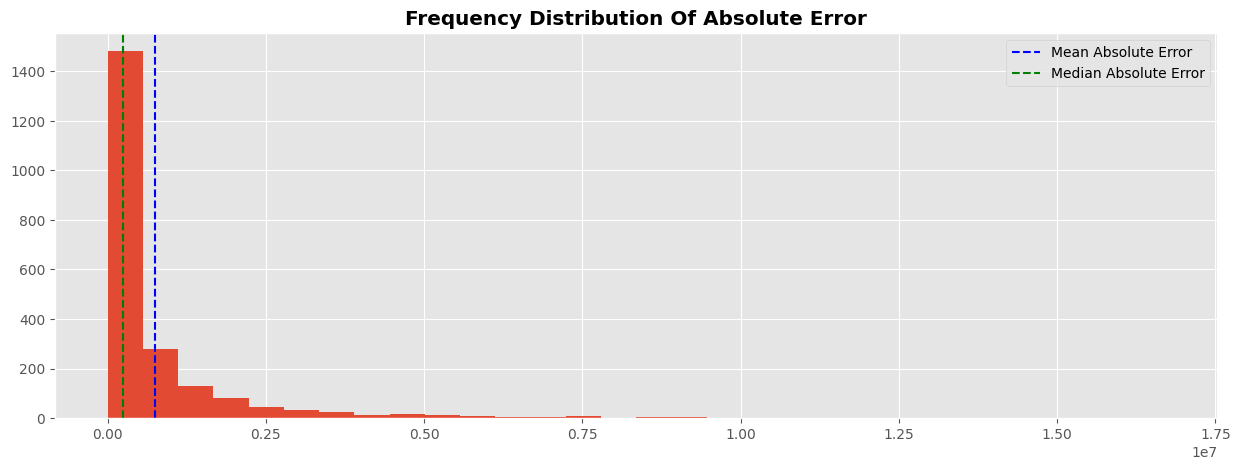

In [23]:
fig,ax=plt.subplots(figsize=(15,5))
X_test['ABS Error'].hist(ax=ax,bins=30)
ax.axvline(X_test['ABS Error'].mean(),label='Mean Absolute Error',color='blue',ls='--')
ax.axvline(X_test['ABS Error'].median(),label='Median Absolute Error',color='green',ls='--')
ax.set_title('Frequency Distribution Of Absolute Error',fontweight='bold')
plt.legend()
plt.show()

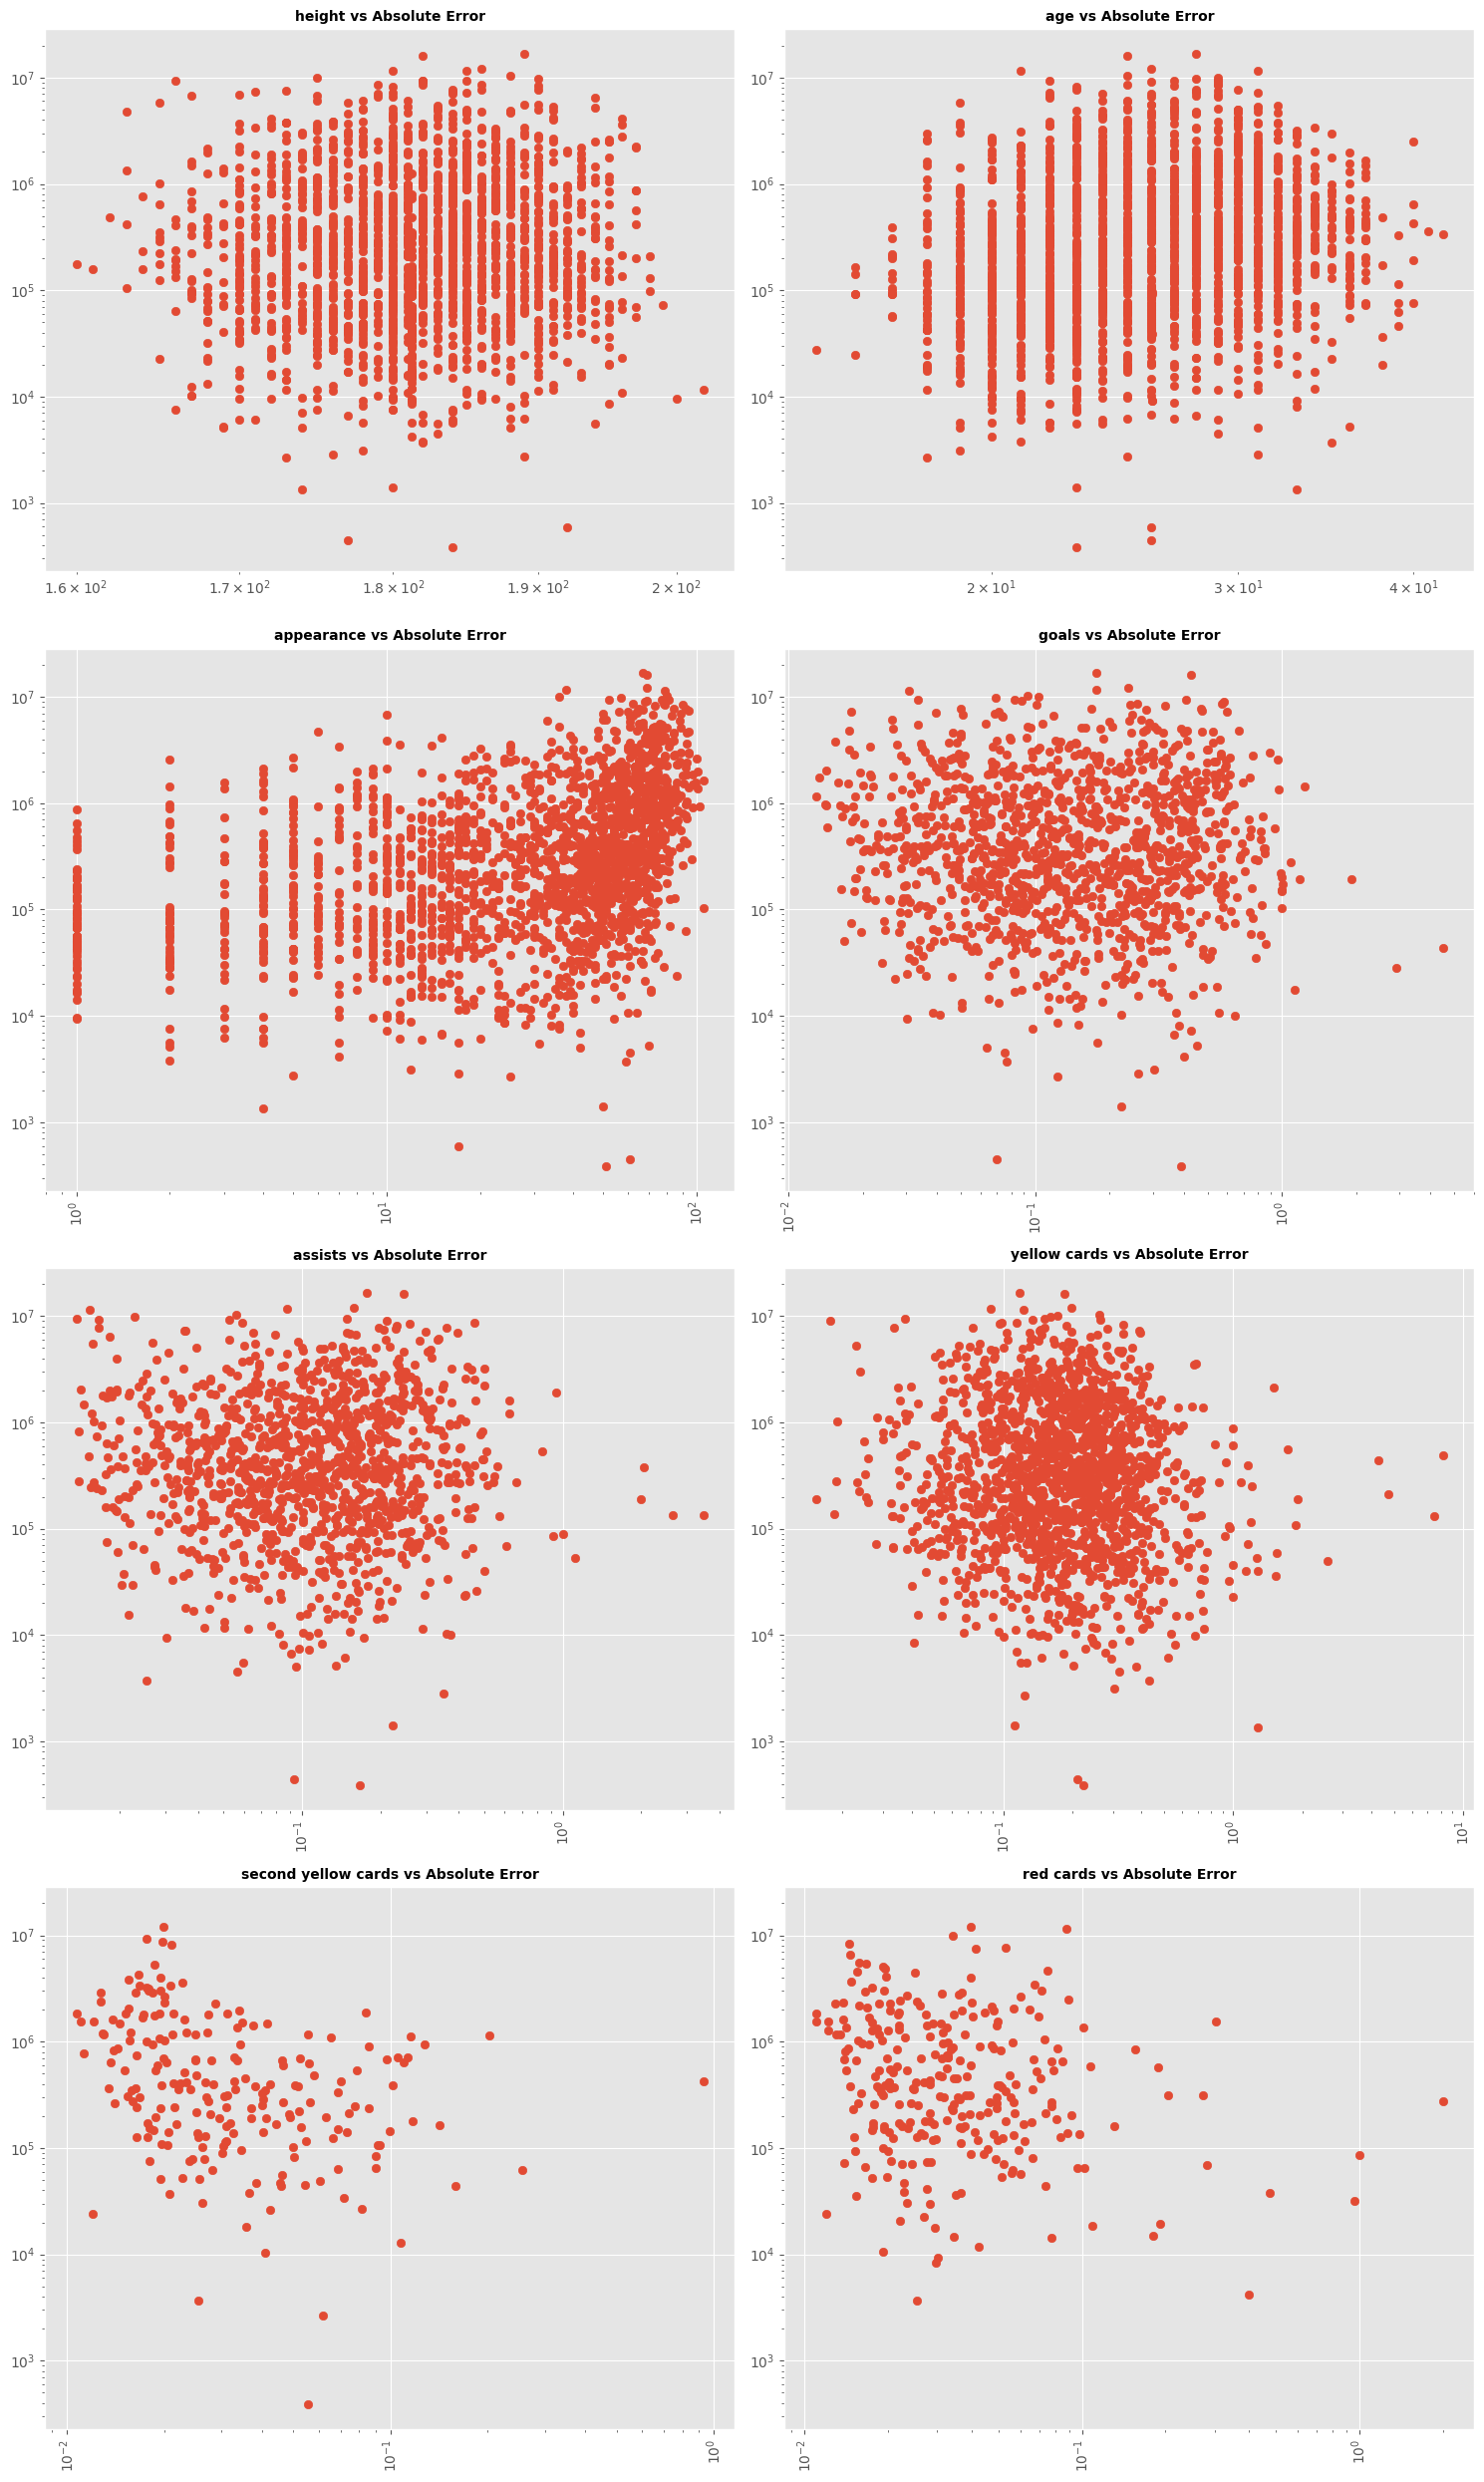

In [24]:
fig,axes=plt.subplots(4,2,figsize=(15,25))

for col,ax in zip(X_test.columns,axes.ravel()):
    X_test=X_test.sort_values(col)
    if X_test[col].nunique()<=25:
        ax.boxplot(labels=X_test[col].unique(),
                   x=[X_test[X_test[col]==label]['ABS Error'] for label in X_test[col].unique()])
        ax.set_title(f'{col} vs Absolute Error',fontweight='bold',size=10)
        ax.set_xticklabels(X_test[col].unique(),rotation=90)
    else:
        ax.scatter(x=X_test[col],y=X_test['ABS Error'])
        ax.set_title(f'{col} vs Absolute Error',fontweight='bold',size=10)
        ax.set_xticklabels(X_test[col].unique(),rotation=90)
        ax.set_xscale('log')
        ax.set_yscale('log')

#plt.subplots_adjust(hspace=0.4)
plt.tight_layout()
plt.show()